In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ydata_synthetic.preprocessing.timeseries.utils


In [2]:
group_index = 0
num_samples = 5
current_group = pd.read_parquet(f'data/preprocessed/group_{group_index}.parquet')
current_group

,cmcouplerfriction,cmdoorfriction,cmelectronicage,cmvibration,doorcyclecounter,doorforce,doorspeed,doorposition
1573,113.800003,107.099998,1.02,1.2,3082,0.000000,-0.0017,0.0067
1573,113.800003,107.099998,1.02,1.2,3082,0.000000,-0.0017,0.0067
1573,113.800003,107.099998,1.02,1.2,3082,0.000000,-0.0017,0.0067
1573,113.800003,107.099998,1.02,1.2,3082,-0.100000,-0.0017,0.0067
1573,113.800003,107.099998,1.02,1.2,3082,0.500000,-0.0017,0.0067
...,...,...,...,...,...,...,...,...
1635,108.199997,148.300003,0.82,1.0,3232,-88.699997,-0.0982,-0.0400
1635,108.199997,148.300003,0.82,1.0,3232,-121.400002,-0.0079,-0.0403
1635,108.199997,148.300003,0.82,1.0,3232,-93.400002,-0.0537,-0.0423
1635,108.199997,148.300003,0.82,1.0,3232,-142.500000,-0.0072,-0.0424


In [3]:
current_group_blocks = ydata_synthetic.preprocessing.timeseries.utils.real_data_loading(current_group, seq_len = 24)
current_group_blocks

[array([[0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.9017437 , 0.60955369, 0.23808384],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.88873513, 0.57838077, 0.21125749],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.88901189, 0.54474096, 0.19041917],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.90119016, 0.50392463, 0.17796407],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.89814558, 0.47140613, 0.1576048 ],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.8544146 , 0.44673692, 0.14419162],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.82562967, 0.41018164, 0.1348503 ],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.79878219, 0.39627718, 0.12766467],
        [0.94749375, 0.18376064, 0.15000016, 0.20000002, 0.26      ,
         0.

In [4]:
synthesized_group_samples = [
	pd.read_parquet(f'data/synthesized/versuch2/group_{group_index}_{sample_index}.parquet')
	for sample_index in range(num_samples)
]


sample_index = 4
block_index  = 0
0 cmcouplerfriction
1 cmdoorfriction
2 cmelectronicage
3 cmvibration
4 doorcyclecounter
5 doorforce
6 doorspeed
7 doorposition


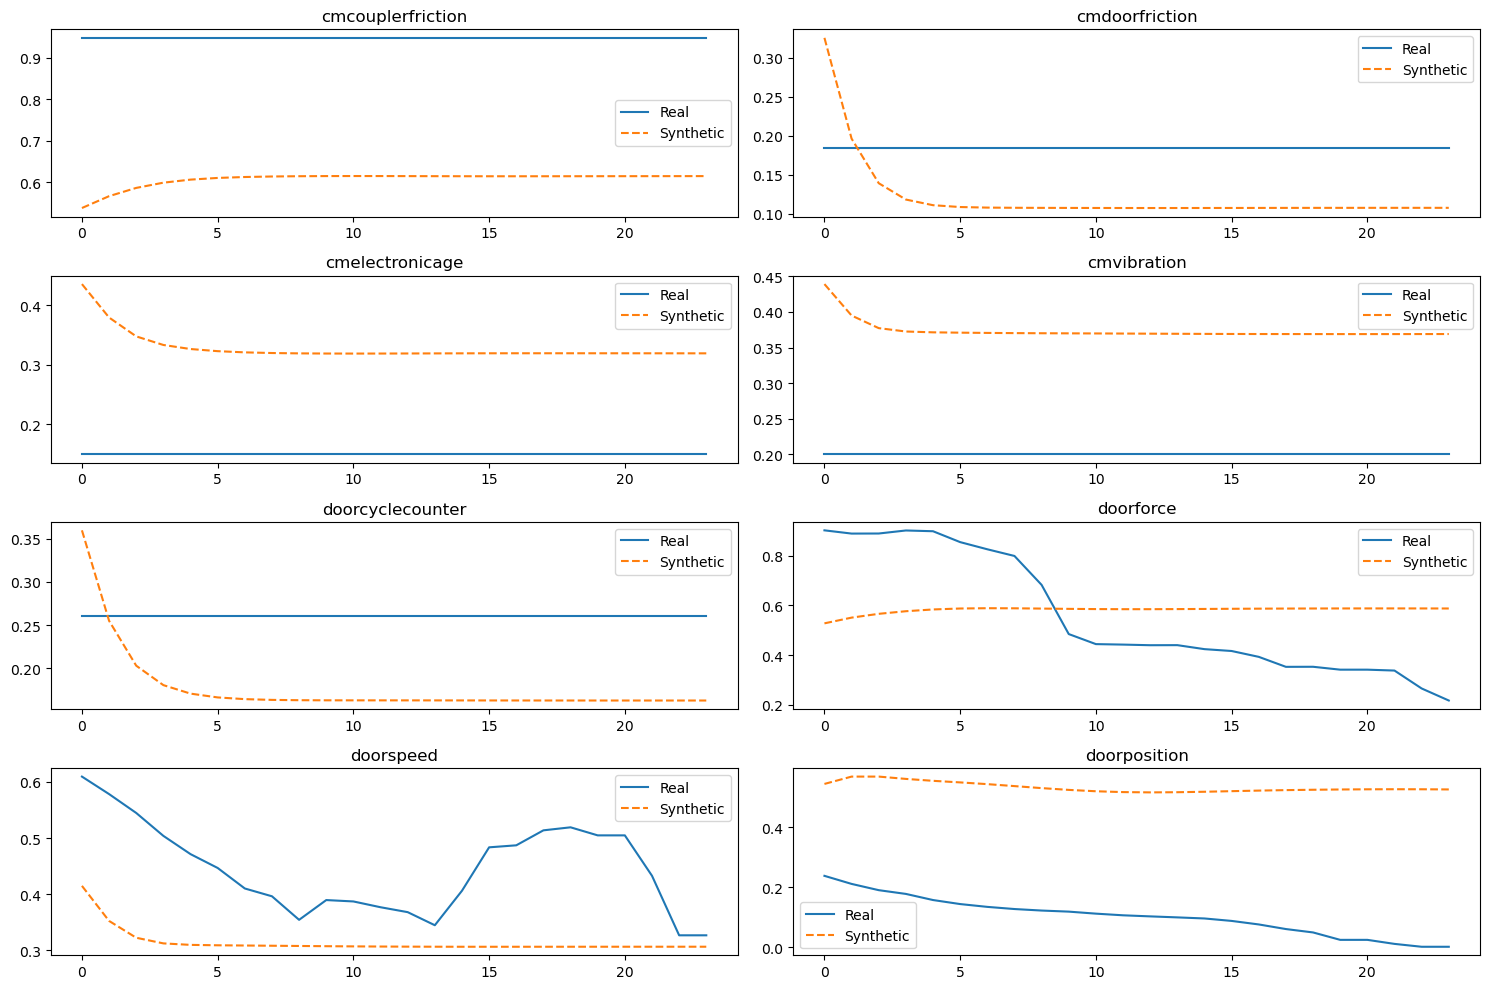

In [5]:

def plot_comparison():
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
    axes=axes.flatten()

    sample_index = 4
    block_index = 0
    print(f'sample_index = {sample_index}')
    print(f'block_index  = {block_index}')

    for j, col in enumerate(list(current_group.columns)):
        df = pd.DataFrame({
            'Real': current_group_blocks[block_index][:, j],
            'Synthetic': synthesized_group_samples[sample_index].iloc[:, j],
        })
        print(j, col)
        # display(df)
        df.plot(
            ax = axes[j],
            title = col,
            secondary_y = 'Synthetic data',
            style = ['-', '--'],
        )
    fig.tight_layout()

plot_comparison()